In [117]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [122]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from joblib import dump

In [ ]:
Testing_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/STEAM/Aumet Data Science Internship Assignment Solution/Data/Testing.csv')
Training_df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/STEAM/Aumet Data Science Internship Assignment Solution/Data/Training.csv')

In [ ]:
print('Training Data : ',Training_df.shape)
print('Testing Data : ',Testing_df.shape)

Training Data :  (4920, 134)
Testing Data :  (42, 133)


In [ ]:
Training_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
for column in Training_df:
    if Training_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, Training_df[column].isnull().sum()))

Unnamed: 133 has 4920 null values


In [ ]:
Training_df.drop('Unnamed: 133', axis=1, inplace=True)

Training_df.isnull().sum().sum()

0

In [ ]:
for column in Testing_df:
    if Testing_df[column].isnull().any():
       print('{0} has {1} null values'.format(column, Testing_df[column].isnull().sum()))

In [ ]:
Training_df.dtypes

itching                  int64
skin_rash                int64
nodal_skin_eruptions     int64
continuous_sneezing      int64
shivering                int64
                         ...  
inflammatory_nails       int64
blister                  int64
red_sore_around_nose     int64
yellow_crust_ooze        int64
prognosis               object
Length: 133, dtype: object

In [ ]:
Training_df.select_dtypes(exclude = ['int64'])

,prognosis
0,Fungal infection
1,Fungal infection
2,Fungal infection
3,Fungal infection
4,Fungal infection
...,...
4915,(vertigo) Paroymsal Positional Vertigo
4916,Acne
4917,Urinary tract infection
4918,Psoriasis


In [ ]:
for column in Training_df:
    if Training_df[column].nunique()>2:
       print('{0} has {1}  nunique values'.format(column, Training_df[column].nunique()))

prognosis has 41  nunique values


In [ ]:
Encoder = preprocessing.LabelEncoder()

Encoder.fit(Training_df["prognosis"])

Training_df["prognosis"] = Encoder.transform(Training_df["prognosis"])
Testing_df["prognosis"] = Encoder.transform(Testing_df["prognosis"])

In [ ]:
Training_df["prognosis"]

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int64

In [ ]:
Encoder.classes_

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [ ]:
X_train= Training_df.drop('prognosis', axis=1)
X_test= Testing_df.drop('prognosis', axis=1)
y_train= np.array(Training_df['prognosis'])
y_test= np.array(Testing_df['prognosis'])

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4920, 132) (42, 132) (4920,) (42,)


Decision Tree model

In [120]:
DecisionTree = DecisionTreeClassifier()
model_DecisionTree = DecisionTree.fit(X_train,y_train)
y_pred = model_DecisionTree.predict(X_test)

print(classification_report(y_test, y_pred, target_names=Encoder.classes_))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

Random Forest model

In [121]:
RandomForest = RandomForestClassifier()
model_RandomForest= RandomForest.fit(X_train,y_train)
y_pred_2 = model_RandomForest.predict(X_test)

print(classification_report(y_test, y_pred_2, target_names=Encoder.classes_))



                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

In [123]:
dump(model_RandomForest, '/content/gdrive/MyDrive/Colab Notebooks/STEAM/Aumet Data Science Internship Assignment Solution/my_model.joblib') 

['/content/gdrive/MyDrive/Colab Notebooks/STEAM/Aumet Data Science Internship Assignment Solution/my_model.joblib']

deep learning model


In [124]:
model_dL = tf.keras.Sequential([
    tf.keras.layers.Dense(256,input_shape=[132],activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(41,activation='softmax')
])


model_dL.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


history = model_dL.fit(X_train,
                    y_train,
                    epochs=20)

Epoch 1/20
154/154 [==============================] - 1s 3ms/step - loss: 1.0064 - accuracy: 0.8555
Epoch 2/20
154/154 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 3/20
154/154 [==============================] - 1s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4/20
154/154 [==============================] - 0s 2ms/step - loss: 9.6483e-04 - accuracy: 1.0000
Epoch 5/20
154/154 [==============================] - 0s 2ms/step - loss: 5.8245e-04 - accuracy: 1.0000
Epoch 6/20
154/154 [==============================] - 0s 2ms/step - loss: 3.9101e-04 - accuracy: 1.0000
Epoch 7/20
154/154 [==============================] - 0s 2ms/step - loss: 2.7812e-04 - accuracy: 1.0000
Epoch 8/20
154/154 [==============================] - 0s 2ms/step - loss: 2.0903e-04 - accuracy: 1.0000
Epoch 9/20
154/154 [==============================] - 0s 2ms/step - loss: 1.6089e-04 - accuracy: 1.0000
Epoch 10/20
154/154 [==============================] - 0s 2ms/step - loss: 1

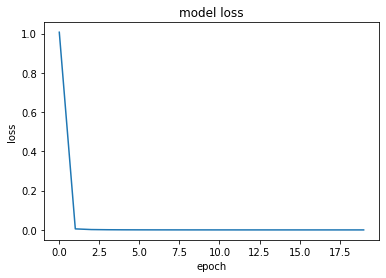

In [125]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [126]:
print(model_dL.evaluate(X_test,y_test))

2/2 [==============================] - 0s 5ms/step - loss: 0.0251 - accuracy: 0.9762
[0.025093887001276016, 0.976190447807312]
